# 41-modeling-SVM
> SVM

Initial scikit-learn exploration. Training an SVM.

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("./data/stats_100r_6200x_4000y_1000s.csv")

In [4]:
df

,Unnamed: 0,id,x,y,2001,2004,2006,2008,2011,2013,2016,2019
0,0,0,550779.199372,1.617497e+06,81,81,81,81,81,81,81,81
1,1,1,550879.199372,1.617497e+06,21,81,21,81,21,81,81,81
2,2,2,550979.199372,1.617497e+06,81,82,81,82,81,82,82,82
3,3,3,551079.199372,1.617497e+06,81,82,81,82,81,82,82,82
4,4,4,551179.199372,1.617497e+06,81,81,81,81,81,81,81,81
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89995,89995,580279.199372,1.587597e+06,82,82,82,82,82,82,82,82
89996,89996,89996,580379.199372,1.587597e+06,82,82,82,82,82,82,82,82
89997,89997,89997,580479.199372,1.587597e+06,82,82,82,81,82,81,81,81
89998,89998,89998,580579.199372,1.587597e+06,82,82,82,82,82,82,82,82


In [5]:
#df_2001 = pd.read_csv("./data/files_100r_6200x_4000y_1000s/ds_2001_100r_6200x_4000y_1000s_tw.csv")
#df_2019 = pd.read_csv("./data/files_100r_6200x_4000y_1000s/ds_2019_100r_6200x_4000y_1000s_tw.csv")

In [6]:
#df2 = df[df["2001"] != df["2019"]]

In [7]:
#df2

In [8]:
df['changed'] = df.apply(lambda row: 1 if row['2001'] != row['2019'] else 0, axis=1)

In [9]:
df

,Unnamed: 0,id,x,y,2001,2004,2006,2008,2011,2013,2016,2019,changed
0,0,0,550779.199372,1.617497e+06,81,81,81,81,81,81,81,81,0
1,1,1,550879.199372,1.617497e+06,21,81,21,81,21,81,81,81,1
2,2,2,550979.199372,1.617497e+06,81,82,81,82,81,82,82,82,1
3,3,3,551079.199372,1.617497e+06,81,82,81,82,81,82,82,82,1
4,4,4,551179.199372,1.617497e+06,81,81,81,81,81,81,81,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89995,89995,580279.199372,1.587597e+06,82,82,82,82,82,82,82,82,0
89996,89996,89996,580379.199372,1.587597e+06,82,82,82,82,82,82,82,82,0
89997,89997,89997,580479.199372,1.587597e+06,82,82,82,81,82,81,81,81,1
89998,89998,89998,580579.199372,1.587597e+06,82,82,82,82,82,82,82,82,0


In [10]:
df_years = df[['2001', '2004', '2008', '2011', '2013', '2016']].to_numpy()

In [11]:
df_years

array([[81, 81, 81, 81, 81, 81],
       [21, 81, 81, 21, 81, 81],
       [81, 82, 82, 81, 82, 82],
       ...,
       [82, 82, 81, 82, 81, 81],
       [82, 82, 82, 82, 82, 82],
       [82, 82, 82, 82, 82, 82]])

In [12]:
df_xy = df[['x', 'y']]

In [13]:
df_xy = df_xy.to_numpy()

In [14]:
df_xy

array([[ 550779.19937192, 1617497.10803599],
       [ 550879.19937192, 1617497.10803599],
       [ 550979.19937192, 1617497.10803599],
       ...,
       [ 580479.19937192, 1587597.10803599],
       [ 580579.19937192, 1587597.10803599],
       [ 580679.19937192, 1587597.10803599]])

In [15]:
df_changed = df['changed'].to_numpy()

In [16]:
y = df_changed

In [17]:
X_2 = df_years

In [27]:
X_2

array([[ 0.85537623,  0.80157436,  0.82629145,  0.86226316,  0.81044501,
         0.80471232],
       [-1.46548629,  0.80157436,  0.82629145, -1.43965386,  0.81044501,
         0.80471232],
       [ 0.85537623,  0.83902346,  0.8631692 ,  0.86226316,  0.84802159,
         0.84246335],
       ...,
       [ 0.89405727,  0.83902346,  0.82629145,  0.90062845,  0.81044501,
         0.80471232],
       [ 0.89405727,  0.83902346,  0.8631692 ,  0.90062845,  0.84802159,
         0.84246335],
       [ 0.89405727,  0.83902346,  0.8631692 ,  0.90062845,  0.84802159,
         0.84246335]])

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_2 = scaler.fit_transform(X_2)

In [19]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=25)

In [20]:
model_2 = svm.SVC(kernel = 'rbf', C=1, gamma=0.01)
model_2.fit(X_train_2, y_train_2)

SVC(C=1, gamma=0.01)

In [ ]:
model = svm.SVC(kernel = 'rbf', C=10, gamma=10)
model.fit(X_train, y_train)

In [73]:
X = df_xy

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [76]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [77]:
model = svm.SVC(kernel = 'rbf', C=10, gamma=10)
model.fit(X_train, y_train)

SVC(C=10, gamma=10)

In [21]:
y_pred_2 = model_2.predict(X_test_2)

In [22]:
y_pred_2[0:300]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
y_test_2[0:300]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [24]:
accuracy_score(y_test_2, y_pred_2)

0.8636111111111111

In [84]:
import matplotlib.pyplot as plt

In [88]:
x_graph = df['x'].to_numpy()

In [89]:
x_graph

array([550779.19937192, 550879.19937192, 550979.19937192, ...,
       580479.19937192, 580579.19937192, 580679.19937192])

In [90]:
y_graph = df['y'].to_numpy()

In [91]:
y_graph

array([1617497.10803599, 1617497.10803599, 1617497.10803599, ...,
       1587597.10803599, 1587597.10803599, 1587597.10803599])

In [92]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [95]:
colors

array(['blue', 'red', 'red', ..., 'red', 'blue', 'blue'], dtype='<U4')

In [94]:
colors = np.where((y == 1), 'red', 'blue')


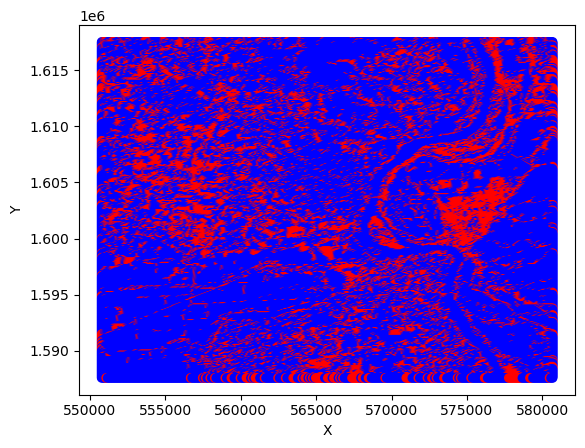

In [96]:
plt.scatter(x_graph, y_graph, c=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

In [63]:
y_test[0:300]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [62]:
y_pred[0:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
accuracy_score(y_test, y_pred)

0.7433333333333333

In [32]:
from sklearn import preprocessing

In [33]:
X_scaled = preprocessing.scale(X)

In [34]:
X_scaled

array([[-1.7262869 ,  1.7262869 ],
       [-1.71473983,  1.7262869 ],
       [-1.70319276,  1.7262869 ],
       ...,
       [ 1.70319276, -1.7262869 ],
       [ 1.71473983, -1.7262869 ],
       [ 1.7262869 , -1.7262869 ]])

In [35]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

In [36]:
model_scaled = svm.SVC()
model_scaled.fit(X_train_scaled, y_train_scaled)

SVC()

In [39]:
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [41]:
accuracy_score(y_test_scaled, y_pred)

0.7433333333333333